# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_dictionary_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print('--- Beginning Data Retrieval ---')

counter = 1

for city in cities:
    print(f"Processing city #{counter} | {city}")
    counter += 1
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    
    # weather_data is the dictionary
    request_data = requests.get(query_url)
    time.sleep(1)
    
    if request_data.status_code == 404:
        print('City not found', city)
    else:
        weather_data = request_data.json()

        weather_dict = {
            'City': weather_data['name'],
            'Cloudiness': weather_data['clouds']['all'],
            'Country': weather_data['sys']['country'],
            'Date': weather_data['dt'],
            'Humidity': weather_data['main']['humidity'],
            'Lat': weather_data['coord']['lat'],
            'Lng': weather_data['coord']['lon'],
            'Max Temp': weather_data['main']['temp_max'],
            'Wind Speed': weather_data['wind']['speed']
        }

        # Add each dictionary to our empty list, one at a time
        city_dictionary_list.append(weather_dict)
    
print('--- Data Retrieval Complete ---')


--- Beginning Data Retrieval ---
Processing city #1 | atuona
Processing city #2 | quelimane
Processing city #3 | hilo
Processing city #4 | te anau
Processing city #5 | port alfred
Processing city #6 | teya
Processing city #7 | ruidoso
Processing city #8 | busselton
Processing city #9 | porto belo
Processing city #10 | grand river south east
City not found grand river south east
Processing city #11 | upernavik
Processing city #12 | ati
Processing city #13 | punta arenas
Processing city #14 | sioux lookout
Processing city #15 | saint-augustin
Processing city #16 | airai
Processing city #17 | albany
Processing city #18 | muros
Processing city #19 | butaritari
Processing city #20 | nouadhibou
Processing city #21 | new norfolk
Processing city #22 | illoqqortoormiut
City not found illoqqortoormiut
Processing city #23 | grand-santi
Processing city #24 | tasiilaq
Processing city #25 | kapaa
Processing city #26 | port blair
Processing city #27 | kumluca
Processing city #28 | rock sound
Processi

Processing city #238 | gurskoye
City not found gurskoye
Processing city #239 | umm durman
City not found umm durman
Processing city #240 | samusu
City not found samusu
Processing city #241 | ballina
Processing city #242 | taltal
Processing city #243 | altay
Processing city #244 | kisangani
Processing city #245 | goya
Processing city #246 | centralina
Processing city #247 | meyungs
City not found meyungs
Processing city #248 | mitsamiouli
Processing city #249 | sinnamary
Processing city #250 | mongagua
Processing city #251 | forbes
Processing city #252 | zhigansk
Processing city #253 | villa rica
Processing city #254 | chichibu
Processing city #255 | lasa
Processing city #256 | tsihombe
City not found tsihombe
Processing city #257 | tupik
Processing city #258 | komsomolskiy
Processing city #259 | sangmelima
Processing city #260 | ijaki
City not found ijaki
Processing city #261 | ponta delgada
Processing city #262 | anadyr
Processing city #263 | cherskiy
Processing city #264 | soto la ma

Processing city #475 | yevlax
Processing city #476 | matagami
Processing city #477 | santa cruz de tenerife
Processing city #478 | uray
Processing city #479 | umzimvubu
City not found umzimvubu
Processing city #480 | aklavik
Processing city #481 | san carlos
Processing city #482 | cardoso
Processing city #483 | zyryanskoye
Processing city #484 | sorvag
City not found sorvag
Processing city #485 | ola
Processing city #486 | ranau
Processing city #487 | saint-georges
Processing city #488 | constitucion
Processing city #489 | vao
Processing city #490 | zhezkazgan
Processing city #491 | millinocket
Processing city #492 | bandarbeyla
Processing city #493 | honningsvag
Processing city #494 | jiddah
City not found jiddah
Processing city #495 | sindand
City not found sindand
Processing city #496 | poum
Processing city #497 | kualakapuas
Processing city #498 | nizhniy ingash
Processing city #499 | taoudenni
Processing city #500 | ternate
Processing city #501 | telford
Processing city #502 | men

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_dictionary_list

[{'City': 'Atuona',
  'Cloudiness': 0,
  'Country': 'PF',
  'Date': 1566338730,
  'Humidity': 74,
  'Lat': -9.8,
  'Lng': -139.03,
  'Max Temp': 79.97,
  'Wind Speed': 20.58},
 {'City': 'Quelimane',
  'Cloudiness': 20,
  'Country': 'MZ',
  'Date': 1566338731,
  'Humidity': 77,
  'Lat': -17.88,
  'Lng': 36.89,
  'Max Temp': 69.8,
  'Wind Speed': 8.05},
 {'City': 'Hilo',
  'Cloudiness': 40,
  'Country': 'US',
  'Date': 1566338732,
  'Humidity': 66,
  'Lat': 19.71,
  'Lng': -155.08,
  'Max Temp': 84.2,
  'Wind Speed': 4.7},
 {'City': 'Te Anau',
  'Cloudiness': 100,
  'Country': 'NZ',
  'Date': 1566338734,
  'Humidity': 84,
  'Lat': -45.41,
  'Lng': 167.72,
  'Max Temp': 38.21,
  'Wind Speed': 3.91},
 {'City': 'Port Alfred',
  'Cloudiness': 4,
  'Country': 'ZA',
  'Date': 1566338735,
  'Humidity': 92,
  'Lat': -33.59,
  'Lng': 26.89,
  'Max Temp': 55.99,
  'Wind Speed': 3},
 {'City': 'Teya',
  'Cloudiness': 75,
  'Country': 'MX',
  'Date': 1566338736,
  'Humidity': 94,
  'Lat': 21.05,
  'L

In [6]:
# create dataframe from city dictionary list
weather_data_df = pd.DataFrame(city_dictionary_list)

# save dataframe as csv
weather_data_df.to_csv(output_data_file, index=False, header=True)

weather_data_df.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

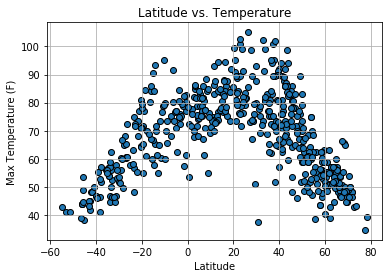

In [7]:
# Extract only the data we need (max temp, latitude)
max_temp_list = weather_data_df['Max Temp']
latitude_list = weather_data_df['Lat']

# Build the graph scatter
plt.scatter(latitude_list, max_temp_list, marker='o', edgecolors='black')

# Modify or Configure the Graph to our Needs
plt.grid(True)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('output_data/LatitudeVsTemp')
plt.show()

#### Latitude vs. Humidity Plot

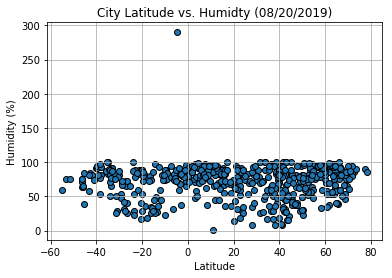

In [8]:
# Extract Humidity
humidity_list = weather_data_df['Humidity']

plt.scatter(latitude_list, humidity_list, edgecolors='black')

plt.grid(True)
plt.title('City Latitude vs. Humidty (08/20/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/CityLatitudeVsHumidity')
plt.show()

#### Latitude vs. Cloudiness Plot

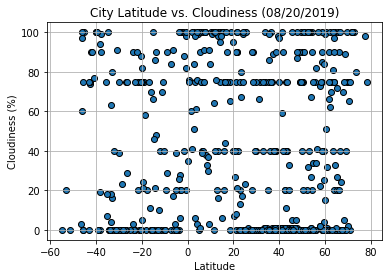

In [9]:
# get cloudiness data
cloudiness_list = weather_data_df['Cloudiness']

plt.scatter(latitude_list, cloudiness_list, edgecolor ='black')

plt.grid(True)
plt.title('City Latitude vs. Cloudiness (08/20/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/CityLatitudeVsCloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

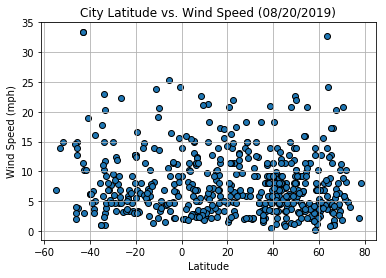

In [10]:
# extract windspeed data
windspeed_list = weather_data_df['Wind Speed']

plt.scatter(latitude_list, windspeed_list, edgecolor = 'black')

plt.title('City Latitude vs. Wind Speed (08/20/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('output_data/CityLatitudeVsWindSpeed')
plt.show()

#### Three observable trends based on the data
1. According to the Latitude vs. Temperature scatter plot, it does appear to be hotter closer to the equator. 
2. There is no apparent correlation between cloudiness and latidude. 
3. The highest wind speed are further away from the equator / the north and south poles. 